## Задача 1. Минимизация гладкой функции
Рассмотрим все ту же функцию из задания по линейной алгебре: f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2), но теперь уже на промежутке [1, 30]

In [90]:
import math
import numpy as np

In [106]:
def func(x):
    y = np.sin(x / 5.0) * np.exp(x / 10.0) + 5 * np.exp(-x / 2.0)
    return y

In [92]:
from scipy.optimize import minimize

In [107]:
minimize(func, 1)

      fun: 1.745268290332218
 hess_inv: array([[6.01541998]])
      jac: array([-2.68220901e-07])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([4.13628697])

In [108]:
minimize(func, 30)

      fun: -11.898894665981313
 hess_inv: array([[1.67936744]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([25.88019321])

In [116]:
first = minimize(func, 2, method='BFGS')
answers = str()
answers += f'{round(func(first.x[0]),2)}'
answers

'1.75'

In [117]:
second = minimize(func, 30, method='BFGS')
answers+= f' {round(func(second.x[0]), 2)}'
answers

'1.75 -11.9'

In [118]:
with open('submission-1.txt', 'w') as f:
    f.write(answers)

In [119]:
import matplotlib.pyplot as plt

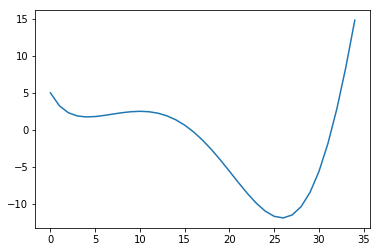

In [120]:
x = [i for i in range(0,35)]
y = [func(i) for i in x]

plt.plot(x, y)
plt.show()

## Задача 2. Глобальная оптимизация
Теперь попробуем применить к той же функции f(x) метод глобальной оптимизации — дифференциальную эволюцию.

In [122]:
from scipy.optimize import differential_evolution

result = differential_evolution(func, [(1,30)])
result

     fun: array([-11.89889467])
     jac: array([1.0658141e-06])
 message: 'Optimization terminated successfully.'
    nfev: 96
     nit: 5
 success: True
       x: array([25.88019469])

In [125]:
result.fun[0]

-11.898894665980501

In [128]:
with open('submission-2.txt', 'w') as f:
    f.write(str(round(result.fun[0],2)))

#### В дифференциальной эволюции за одну итерацию требуется выполнить 96 действий, а в методе BFGS нужно выполнить 24 действия.

## Задача 3. Минимизация негладкой функции
Теперь рассмотрим функцию h(x) = int(f(x)) на том же отрезке [1, 30], т.е. теперь каждое значение f(x) приводится к типу int и функция принимает только целые значения.

In [145]:
def h(x):
    return int(func(x))

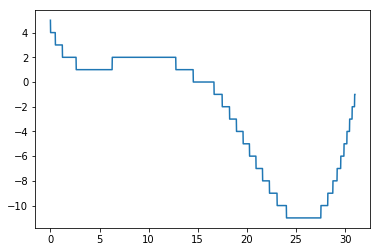

In [148]:
x = [i for i in np.arange(0,31,0.01)]
y = [h(i) for i in x]

plt.plot(x, y)
plt.show()

In [155]:
first = minimize(h, 30, method='BFGS')
answers = str()
answers += f'{first.fun}'
answers

'-5'

In [156]:
second = differential_evolution(h, [(1,30)])
answers += f' {second.fun}'
answers

'-5 -11.0'

In [157]:
with open('submission-3.txt', 'w') as f:
    f.write(answers)